# Actividad practica

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

## Datos

Bases de datos sugeridas:
- Skin Cancer ISIC https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign/data - Imagenes de piel con y sin cancer de piel.
- ECG Heartbeat Categorization Dataset https://www.kaggle.com/datasets/shayanfazeli/heartbeat - Series de tiempo con señales ECG.
- Medical Appointment No Shows https://www.kaggle.com/datasets/joniarroba/noshowappointments/data - Tabla con informacion de pacientes que no llegan a citas medicas.

In [3]:
#Lectura de datos
data = pd.read_csv(r"C:\Users\jorda\Downloads\Diplomado\Procesamiento\data.csv")
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
data.info() #Muestra info de cada columna de la tabla, indicando la cantidad de datos y que tipo de dato contiene

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
data.nunique() #Muestra la cantidad de variables distintas en cada columna.

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
data.describe() #Muestra un resumen estadistico de las variables numericas.

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Inspección de datos

- Cuantos datos hay?
- Cuantas caracteristicas tiene cada dato?
- Cual es el valor maximo? Cual es el valor minimo?

- La tabla contiene 110527 filas y 14 columnas, de las cuales 1 contiene "float", 8 contienen "int" y 5 contienen variables categoricas.
- Hay columnas con 2 variables como Gender, Scholarship, Hipertension, entre otras; con 5 variables como Handcap; y 81 variables como Neighbourhood.
- La columna edad, como único dato numérico a considerar, tiene un valor minimo de "-1" y un valor maximo de "115".
- Los datos a considerar para el análisis de esta tabla podrían incluir la edad, el vecindario, presencia de alguna enfermedad y la recepción de un SMS.

In [7]:
data.isna().sum() #identifica datos faltantes, que luego se van sumando, en cada una de las columnas

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
data = data[(data["Age"] >=0) & (data["Age"]<=100)] #Se eliminan los datos incoherentes y extremos.
data.info() #Volvemos a ver la información de la tabla para corroborar los datos eliminados
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 110519 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110519 non-null  float64
 1   AppointmentID   110519 non-null  int64  
 2   Gender          110519 non-null  object 
 3   ScheduledDay    110519 non-null  object 
 4   AppointmentDay  110519 non-null  object 
 5   Age             110519 non-null  int64  
 6   Neighbourhood   110519 non-null  object 
 7   Scholarship     110519 non-null  int64  
 8   Hipertension    110519 non-null  int64  
 9   Diabetes        110519 non-null  int64  
 10  Alcoholism      110519 non-null  int64  
 11  Handcap         110519 non-null  int64  
 12  SMS_received    110519 non-null  int64  
 13  No-show         110519 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105190e+05,1.105190e+05,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000
mean,1.474860e+14,5.675303e+06,37.084519,0.098273,0.197251,0.071870,0.030402,0.022213,0.321040
std,2.560826e+14,7.129600e+04,23.103165,0.297684,0.397925,0.258274,0.171692,0.161441,0.466878
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725522e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# Identificar duplicados
duplicados = data.duplicated()
print("Duplicados encontrados:")
print(data[duplicados])

Duplicados encontrados:
Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []


### Limpieza

- Hay valores incompletos?
- Hay valores incoherentes?
- Elimine los que encuentre anomalos

- La tabla no contiene datos incompletos ni duplicados.
- Sí, la variable edad contiene datos incoherentes con valor negativo.
- Limpiando los datos anómalos y extremos de la variable 'Age', se eliminaron 8 filas.

### Normalización

- Como se verian los datos con normalización max?
- Como se verian los datos con normalización min-max?
- Como se verian los datos con normalización estandar?

In [10]:
#Solo a modo de ejemplo, ya que para estos datos no se necesita ningun tipo de normalizacion
edad=data["Age"].to_numpy()
edad_max=edad/max(edad) #Normalizacion max
edad_max

array([0.62, 0.56, 0.62, ..., 0.21, 0.38, 0.54])

In [11]:
#Normalizacion min-max
edad_minmax=(edad-min(edad))/(max(edad)-min(edad))
edad_minmax

array([0.62, 0.56, 0.62, ..., 0.21, 0.38, 0.54])

In [12]:
#Normalizacion Z-score
mu=np.mean(edad)
sigma=np.std(edad)
edad_norm=(edad-mu)/sigma
edad_norm

array([ 1.07844937,  0.81874351,  1.07844937, ..., -0.69620731,
        0.03962595,  0.73217489])

## Distribución

Elije una normalización, luego antes y despues de la normalización:
- Calcula rango
- Calcula media
- Calcula mediana
- Calcula desviación estandar

In [13]:
pd_edad=pd.DataFrame(edad_max) #Convierte el array de la edad_max en dataframe
print(pd_edad.describe()) #Resumen estadistico de la variable edad normalizada 

                   0
count  110519.000000
mean        0.370845
std         0.231032
min         0.000000
25%         0.180000
50%         0.370000
75%         0.550000
max         1.000000


In [14]:
print(np.median(edad)) #Mediana de la edad sin normalizar
print(np.median(edad_max)) #Mediana de la edad normalizada

37.0
0.37


In [15]:
moda_edad=data['Age'].mode()#Calcular la moda de la variable 'Age'
print (moda_edad.values)
moda_edadmax=pd_edad.mode() #Calcular moda de la edad max a partir del dataframe creado
print (moda_edadmax.values)

[0]
[[0.]]


Si compararmos la variable edad antes y despues de la normalización max, queda así:
- Rango: antes (0 a 100) despues (0 a 1)
- Media: antes (37.09) despues (0.3709)
- Mediana antes (37) despues (0.37)
- Desviación estándar: antes (23.1) despues (0.231)
- Moda: antes (0) despues (0)

## Visualización

- Graficar al menos un ejemplo de los datos de la base de datos
- Graficar ejemplo normalizado
- Graficar distribución del conjunto de datos escogidos, señalando media, mediana y desviacion estandar.

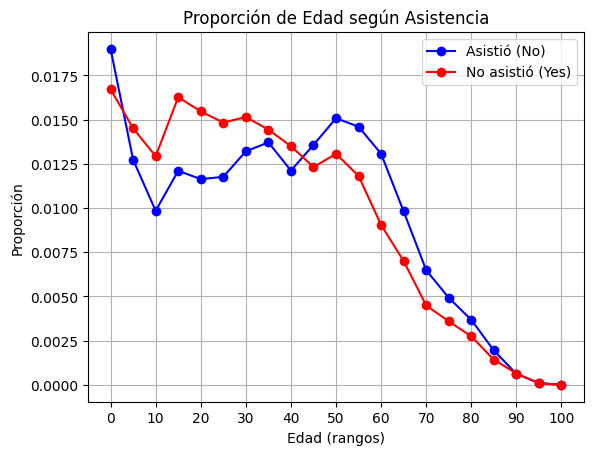

In [31]:
#Definir variable
show = data[data['No-show'] == 'No']  # Pacientes que asistieron
no_show = data[data['No-show'] == 'Yes']  # Pacientes que no asistieron

# Definir los rangos de edad (rango)
rango = np.arange(0, data['Age'].max() + 6, 5)  # Rango de edad de 0 a max, cada 5 años

# Calcular proporciones para cada categoría
show_hist, _ = np.histogram(show['Age'], bins=rango, density=True)
no_show_hist, _ = np.histogram(no_show['Age'], bins=rango, density=True)

# Graficar las proporciones
plt.plot(rango[:-1], show_hist, label='Asistió (No)', color='blue', marker='o')
plt.plot(rango[:-1], no_show_hist, label='No asistió (Yes)', color='red', marker='o')

# Añadir etiquetas y leyenda
plt.title('Proporción de Edad según Asistencia')
plt.xlabel('Edad (rangos)')
plt.xticks(np.arange(0, rango[-1] + 1, 10))
plt.ylabel('Proporción')
plt.grid()
plt.legend()
plt.show()

In [34]:
sms_group = data.groupby('SMS_received')['No-show'].value_counts(normalize=True).unstack()
print(sms_group)


No-show             No       Yes
SMS_received                    
0             0.832991  0.167009
1             0.724247  0.275753


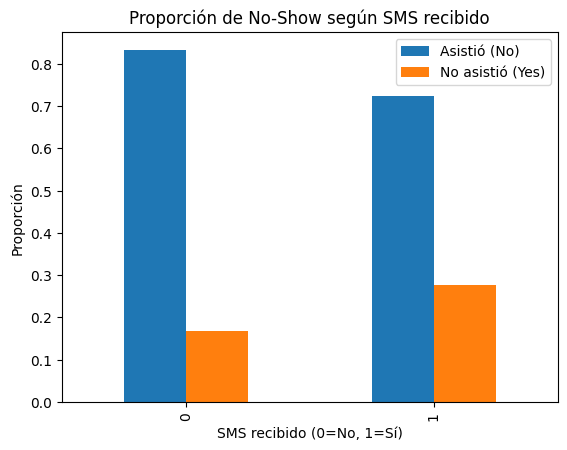

In [35]:
sms_group.plot(kind='bar')
plt.title('Proporción de No-Show según SMS recibido')
plt.xlabel('SMS recibido (0=No, 1=Sí)')
plt.ylabel('Proporción')
plt.legend(['Asistió (No)', 'No asistió (Yes)'])
plt.show()
